In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Import Tree Models from scratch functions
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/TreeModelsFromScratch")

from DecisionTree import DecisionTree
from RandomForest import RandomForest

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imodels import HSTreeClassifier, HSTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Tree models

## Regression

In [4]:
X_r, y_r = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Train test split
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.2, random_state=1234)

### Vanilla sklearn

In [5]:
reg_sklearn = DecisionTreeRegressor(max_depth=2, random_state=42)
reg_sklearn.fit(X_r_train, y_r_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [6]:
y_r_pred = reg_sklearn.predict(X_r_test)

In [7]:
rmse_sklearn = mean_squared_error(y_r_test, y_r_pred, squared=True)
rmse_sklearn

3882.7794517024054

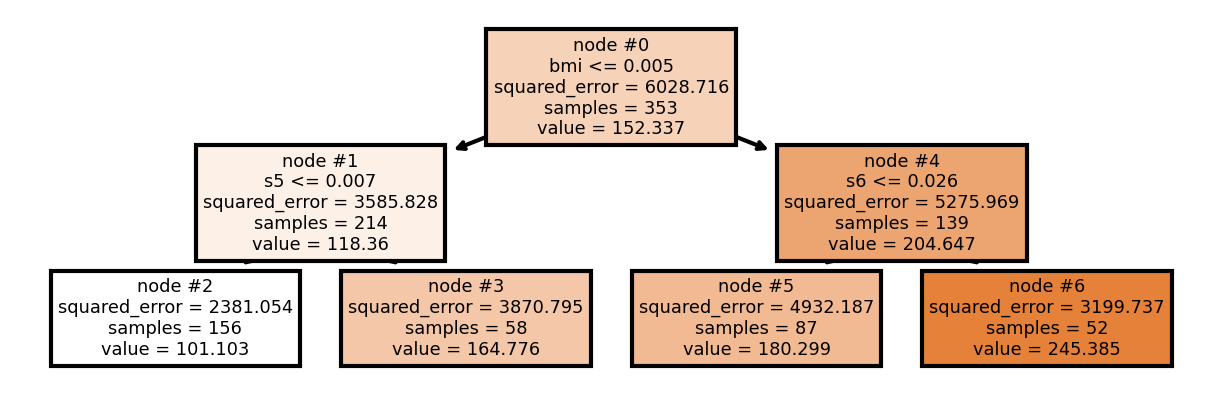

In [8]:
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(reg_sklearn, feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

### Vanilla HS from imodels package

In [9]:
from sklearn.base import clone
reg_sklearn_forHS = clone(reg_sklearn)

In [10]:
reg_hs = HSTreeRegressor(reg_sklearn_forHS, reg_param=1., shrinkage_scheme_="node_based")

reg_hs.fit(X_r_train, y_r_train)

In [11]:
y_r_pred_imodels = reg_hs.predict(X_r_test)

In [12]:
rmse_imodels = mean_squared_error(y_r_test, y_r_pred_imodels, squared=True)
rmse_imodels

3877.1962740983845

In [13]:
reg_hs.get_params()

{'reg_param': 1.0,
 'estimator_': DecisionTreeRegressor(max_depth=2, random_state=42),
 'shrinkage_scheme_': 'node_based'}

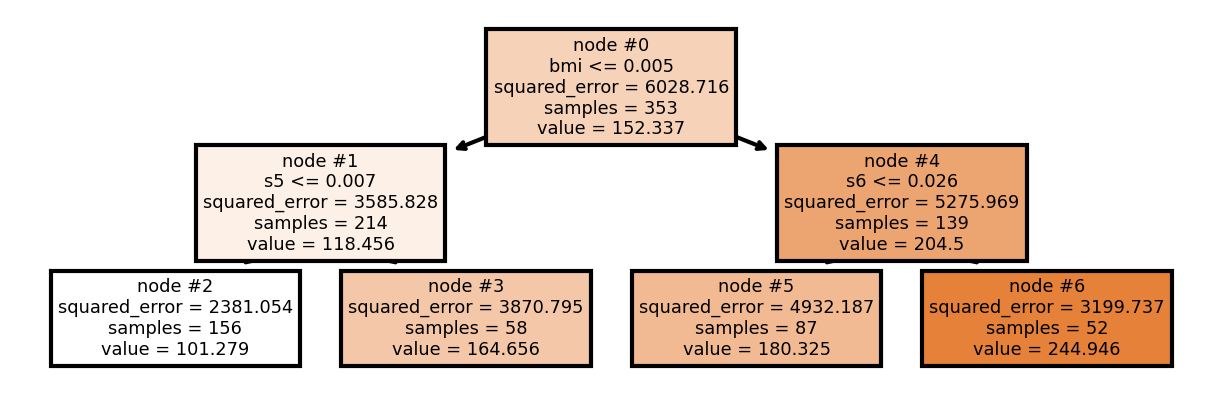

In [14]:
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(reg_hs.estimator_, feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

### TreeModels from Scratch 

#### Without HS

In [15]:
# Train DecisionTree from scratch
reg_tree = DecisionTree(max_depth=2, treetype="regression",HShrinkage=False, random_state=42)
reg_tree.fit(X_r_train, y_r_train.values)

In [16]:
# Predict
y_r_pred = reg_tree.predict(X_r_test)

In [17]:
rmse_tree_scratch = mean_squared_error(y_r_test, y_r_pred, squared=True)
rmse_tree_scratch

3882.7794517024054

In [18]:
rmse_tree_scratch ==rmse_sklearn

True

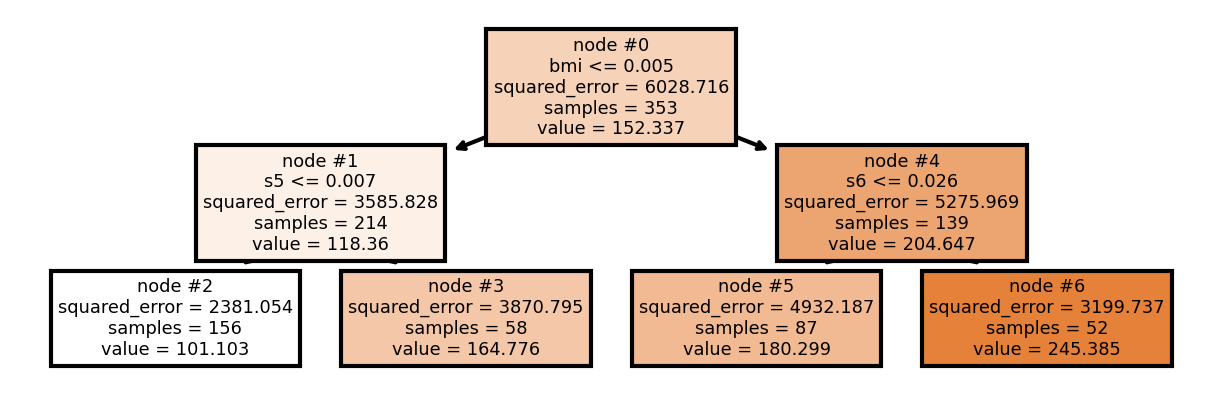

In [19]:
# Comparison with sklearn
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(reg_sklearn, feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

In [20]:
reg_tree.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12ab20a00>,
  'id': 0,
  'depth': 0,
  'feature': 'bmi',
  'is_leaf_node': False,
  'threshold': 0.005111072639941301,
  'gini': 6028.716384851817,
  'samples': 353,
  'value': 152.3371104815864},
 1: {'node': <DecisionTree.Node at 0x12ab20a30>,
  'id': 1,
  'depth': 1,
  'feature': 's5',
  'is_leaf_node': False,
  'threshold': 0.006616937565137579,
  'gini': 3585.8284784697353,
  'samples': 214,
  'value': 118.35981308411215},
 2: {'node': <DecisionTree.Node at 0x12aafb520>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 2381.053583168968,
  'samples': 156,
  'value': 101.1025641025641},
 3: {'node': <DecisionTree.Node at 0x12ab20a90>,
  'id': 3,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 3870.7945897740783,
  'samples': 58,
  'value': 164.77586206896552},
 4: {'node': <DecisionTree.Node at 0x12ab20ac0>,
  'id': 4,
  'depth': 1,
  'feature': 's6',
  'is

In [21]:
# node values from scratch without HS: 
node_values_scratch = [node.value for node in reg_tree.node_list]
node_values_scratch

[152.3371104815864,
 118.35981308411215,
 101.1025641025641,
 164.77586206896552,
 204.6474820143885,
 180.29885057471265,
 245.3846153846154]

In [22]:
# node values from sklearn without HS: 
node_values_sk = np.concatenate(reg_sklearn.tree_.value).ravel().tolist()
node_values_sk

[152.3371104815864,
 118.35981308411215,
 101.1025641025641,
 164.77586206896552,
 204.6474820143885,
 180.29885057471265,
 245.3846153846154]

In [23]:
#diff between sklearn and scratch
for i, j in zip(node_values_sk, node_values_scratch):
    print(i-j)

0.0
0.0
0.0
0.0
0.0
0.0
0.0


They are equal!

In [24]:
# Information gain / feature importances sklearn
reg_sklearn.feature_importances_

array([0.        , 0.        , 0.66980883, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18300082, 0.14719035])

In [25]:
# Information gain / feature importances scratch
reg_tree.feature_importances_

array([0.        , 0.        , 0.66980883, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18300082, 0.14719035])

In [26]:
#diff between sklearn and scratch
for i, j in zip(np.round(reg_sklearn.feature_importances_,8), np.round(reg_tree.feature_importances_,8)):
    print(i-j)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


They are equal!

#### With HS

In [27]:
# Train DecisionTree from scratch
reg_treeHS = DecisionTree(max_depth=2, treetype="regression", HS_lambda=1., HShrinkage=True, random_state=42)
reg_treeHS.fit(X_r_train, y_r_train.values)

In [28]:
# Predict
y_r_pred_scratch = reg_treeHS.predict(X_r_test)

In [29]:
rmse_tree_scratchHS = mean_squared_error(y_r_test, y_r_pred_scratch, squared=True)
rmse_tree_scratchHS

3877.1962740983845

In [30]:
rmse_tree_scratchHS ==rmse_imodels

True

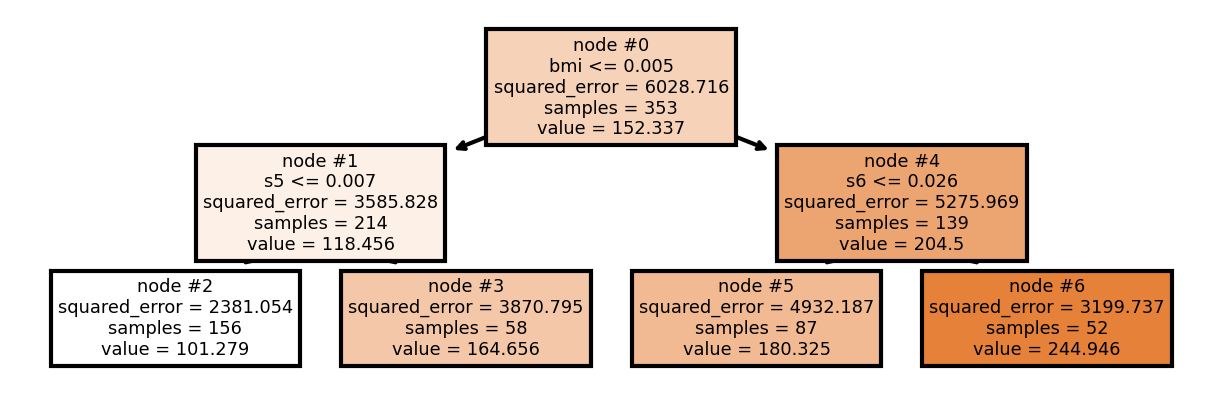

In [31]:
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(reg_hs.estimator_, feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

In [32]:
reg_treeHS.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12ab39c60>,
  'id': 0,
  'depth': 0,
  'feature': 'bmi',
  'is_leaf_node': False,
  'threshold': 0.005111072639941301,
  'gini': 6028.716384851817,
  'samples': 353,
  'value': 152.3371104815864},
 1: {'node': <DecisionTree.Node at 0x12ab39420>,
  'id': 1,
  'depth': 1,
  'feature': 's5',
  'is_leaf_node': False,
  'threshold': 0.006616937565137579,
  'gini': 3585.8284784697353,
  'samples': 214,
  'value': 118.45579415020671},
 2: {'node': <DecisionTree.Node at 0x10eadda20>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 2381.053583168968,
  'samples': 156,
  'value': 101.27881144299145},
 3: {'node': <DecisionTree.Node at 0x12ab387f0>,
  'id': 3,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 3870.7945897740783,
  'samples': 58,
  'value': 164.65595453513055},
 4: {'node': <DecisionTree.Node at 0x12ab38940>,
  'id': 4,
  'depth': 1,
  'feature': 's6',
  'i

In [33]:
# node values from sklearn with HS: 
node_values_imodels = np.concatenate(reg_hs.estimator_.tree_.value).ravel().tolist()
node_values_imodels

[152.3371104815864,
 118.45579415020671,
 101.27881144299145,
 164.65595453513055,
 204.49971260327888,
 180.32499995960072,
 244.94586644943274]

In [34]:
# node values from scratch without HS: 
node_values_scratchHS = [node.value for node in reg_treeHS.node_list]
node_values_scratchHS

[152.3371104815864,
 118.45579415020671,
 101.27881144299145,
 164.65595453513055,
 204.49971260327888,
 180.32499995960072,
 244.94586644943274]

In [35]:
# Comparison scratch vs imodels
for i, j in zip(node_values_imodels, node_values_scratchHS):
    print(i-j)

0.0
0.0
0.0
0.0
0.0
0.0
0.0


My HS are equal to the one from imodels!!!

### TreeModel from Scratch Dingyi

#### Without HS

In [36]:
#set module path (for imports)
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/ExplainableAI/RF_from_scratch/utils")

In [37]:
#tree functions
from helper_function import decision_tree_algorithm, decision_tree_predictions

/Users/philippheitmann/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/treeinterpreter/treeinterpreter.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.17"):
/Users/philippheitmann/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/treeinterpreter/treeinterpreter.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.17"):


In [124]:
# "Fit" tree
tree, feature_gain, y_list = decision_tree_algorithm(X_r_train, y_r_train, len(y_r_train), max_depth=2, random_state=42)

In [125]:
y_list

{0: [0, 353, 152.3371104815864],
 1: [1, 214, 118.35981308411215],
 2: [2, 156, 102.80899070593583],
 3: [2, 58, 163.63973072740862],
 4: [1, 139, 204.6474820143885],
 5: [2, 87, 180.4919298459266],
 6: [2, 52, 241.20952252093653]}

In [126]:
tree

{'bmi <= 0.005111072639941301 with num of samples 353 and current y 152.3371104815864 and above y {0: [0, 353, 152.3371104815864]}': [{'s5 <= 0.006616937565137579 with num of samples 214 and current y 118.35981308411215 and above y {0: [0, 353, 152.3371104815864], 1: [1, 214, 118.35981308411215]}': [102.80899070593583,
    163.63973072740862]},
  {'s6 <= 0.025845997445957995 with num of samples 139 and current y 204.6474820143885 and above y {0: [0, 353, 152.3371104815864], 1: [1, 214, 118.35981308411215], 2: [2, 156, 102.80899070593583], 3: [2, 58, 163.63973072740862], 4: [1, 139, 204.6474820143885]}': [180.4919298459266,
    241.20952252093653]}]}

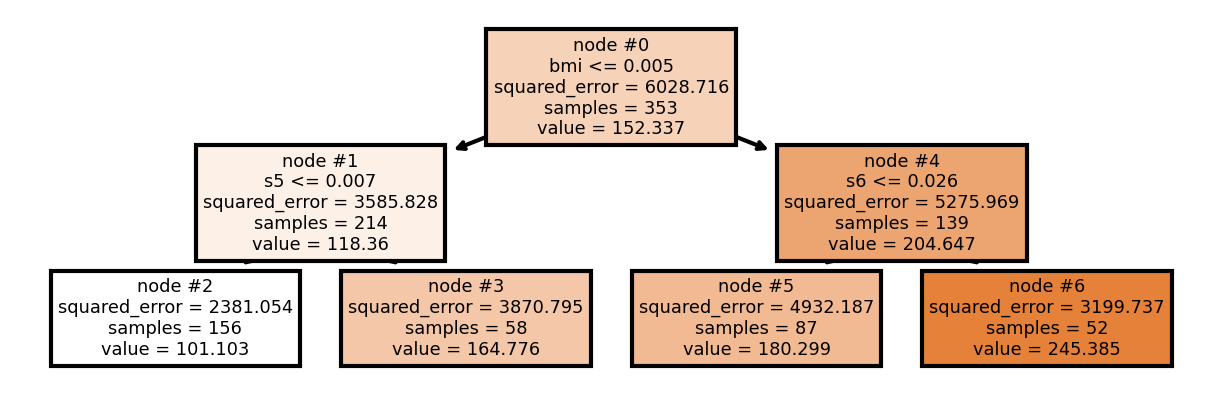

In [115]:
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(reg_sklearn, feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

In [127]:
node_values_dingyi = [node[2] for node in y_list.values()]
node_values_dingyi

[152.3371104815864,
 118.35981308411215,
 102.80899070593583,
 163.63973072740862,
 204.6474820143885,
 180.4919298459266,
 241.20952252093653]

In [128]:
for i, j in zip(node_values_sk, node_values_dingyi):
    print(i-j)

0.0
0.0
-1.7064266033717246
1.1361313415569043
0.0
-0.1930792712139464
4.175092863678856


In [44]:
node_samples_dingyi = [node[1] for node in y_list.values()]
node_samples_dingyi

[353, 214, 156, 58, 139, 87, 52]

In [45]:
reg_sklearn.tree_.n_node_samples

array([353, 214, 156,  58, 139,  87,  52], dtype=int64)

The values from Dingyi's code are not equal to the values from sklearn even though the number of samples in each node is the same?!

## Classification

In [46]:
# Load data
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Vanilla sklearn

In [47]:
clf_sklearn = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_sklearn.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [48]:
y_pred = clf_sklearn.predict(X_test)

In [49]:
acc_sklearn = accuracy_score(y_test, y_pred)
acc_sklearn

0.9210526315789473

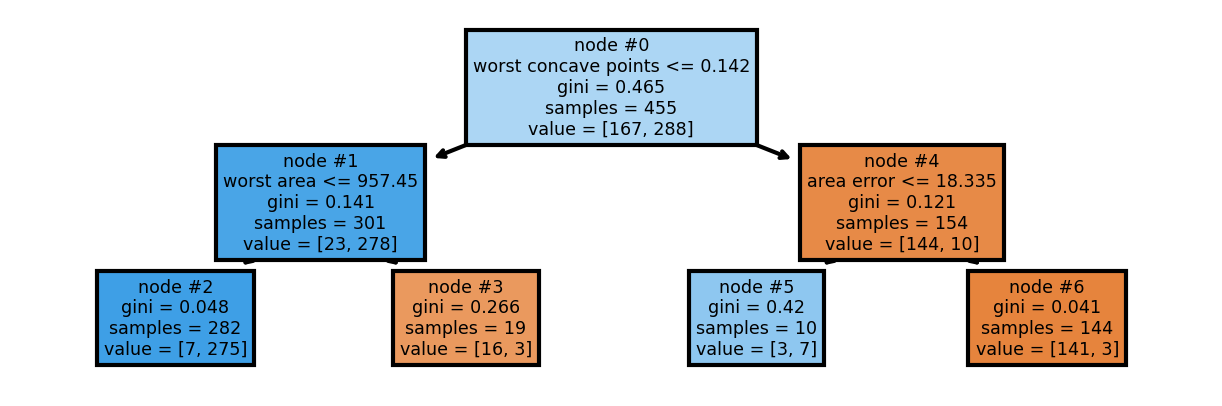

In [50]:
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(clf_sklearn, feature_names=X_train.columns, node_ids=True, filled=True, ax=ax);

In [51]:
clf_sklearn.tree_.weighted_n_node_samples

array([455., 301., 282.,  19., 154.,  10., 144.])

### Vanilla HS from imodels package

In [52]:
clf_sklearn_forHS = clone(clf_sklearn)

lambd = 10.

clf_hs = HSTreeClassifier(clf_sklearn_forHS, reg_param=lambd, shrinkage_scheme_="node_based")

clf_hs.fit(X_train, y_train)

In [53]:
y_pred_imodels = clf_hs.predict(X_test)

In [54]:
acc_imodels = accuracy_score(y_test, y_pred_imodels)
acc_imodels

0.9210526315789473

In [55]:
acc_imodels == acc_sklearn

True

In [56]:
clf_hs.get_params()

{'reg_param': 10.0,
 'estimator_': DecisionTreeClassifier(max_depth=2, random_state=42),
 'shrinkage_scheme_': 'node_based'}

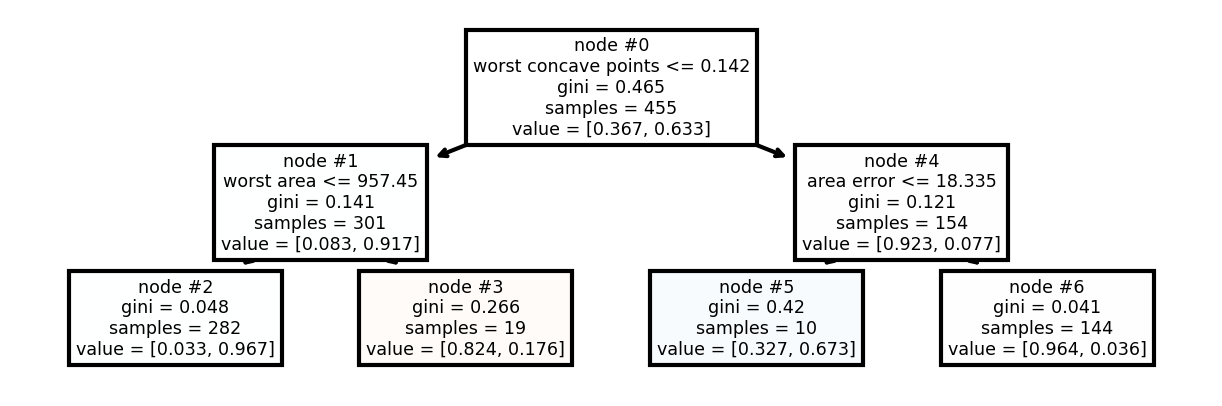

In [57]:
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(clf_hs.estimator_, feature_names=X_train.columns, node_ids=True, filled=True, ax=ax);

### TreeModels from Scratch

#### Without HS

In [58]:
# Train DecisionTree from scratch
clf_tree = DecisionTree(max_depth=2, treetype="classification", HShrinkage=False, random_state=42)
clf_tree.fit(X_train, y_train)

In [59]:
# Predict
y_pred = clf_tree.predict(X_test)

In [60]:
acc_tree_scratch = accuracy_score(y_test, y_pred)
acc_tree_scratch

0.9210526315789473

In [61]:
acc_tree_scratch == acc_sklearn

True

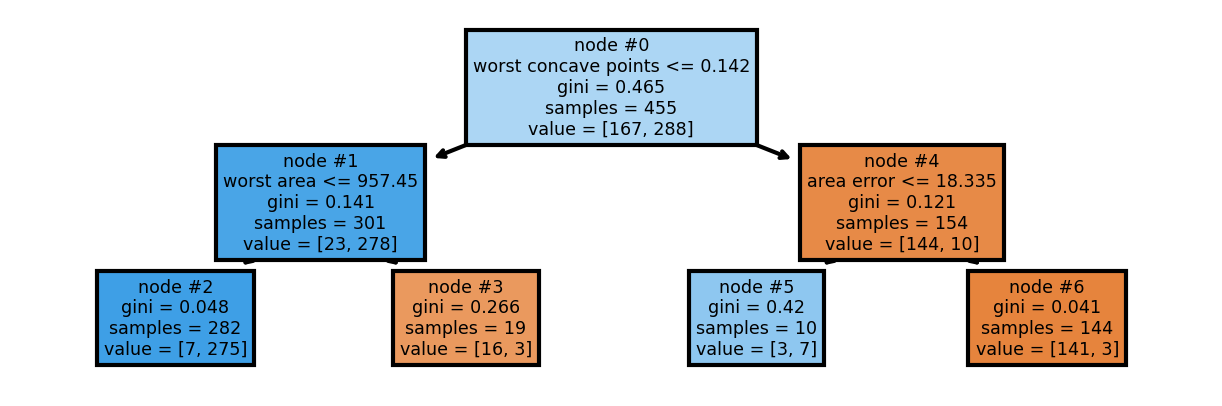

In [62]:
# Comparison with sklearn
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(clf_sklearn, feature_names=X_train.columns, node_ids=True, filled=True, ax=ax);

In [63]:
clf_tree.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12ad5a9b0>,
  'id': 0,
  'depth': 0,
  'feature': 'worst concave points',
  'is_leaf_node': False,
  'threshold': 0.1417,
  'gini': 0.4646395362878879,
  'samples': 455,
  'value': 1,
  'value_distribution': [167, 288],
  'prob_distribution': [0.367032967032967, 0.6329670329670329]},
 1: {'node': <DecisionTree.Node at 0x12ad59f00>,
  'id': 1,
  'depth': 1,
  'feature': 'worst area',
  'is_leaf_node': False,
  'threshold': 957.45,
  'gini': 0.14114634496307987,
  'samples': 301,
  'value': 1,
  'value_distribution': [23, 278],
  'prob_distribution': [0.07641196013289037, 0.9235880398671097]},
 2: {'node': <DecisionTree.Node at 0x12acfa500>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.048413057693274864,
  'samples': 282,
  'value': 1,
  'value_distribution': [7, 275],
  'prob_distribution': [0.024822695035460994, 0.975177304964539]},
 3: {'node': <DecisionTree.Node at 0x12ad5a380>,
  'id': 3,
 

In [64]:
# node value distribution from sklearn without HS: 
np.concatenate(clf_sklearn.tree_.value)

array([[167., 288.],
       [ 23., 278.],
       [  7., 275.],
       [ 16.,   3.],
       [144.,  10.],
       [  3.,   7.],
       [141.,   3.]])

In [65]:
# node value distribution from scratch without HS: 
node_values_scratch_clf = [node.clf_value_dis for node in clf_tree.node_list]
np.array(node_values_scratch_clf)

array([[167, 288],
       [ 23, 278],
       [  7, 275],
       [ 16,   3],
       [144,  10],
       [  3,   7],
       [141,   3]])

They are the same!

#### With HS

In [66]:
# Train DecisionTree from scratch
clf_treeHS = DecisionTree(max_depth=2, treetype="classification", HS_lambda=lambd, HShrinkage=True, random_state=42)
clf_treeHS.fit(X_train, y_train)

In [67]:
# Predict
y_pred_scratchHS = clf_treeHS.predict(X_test)

In [68]:
acc_tree_scratchHS = accuracy_score(y_test, y_pred_scratchHS)
acc_tree_scratchHS

0.9210526315789473

In [69]:
acc_tree_scratchHS == acc_imodels

True

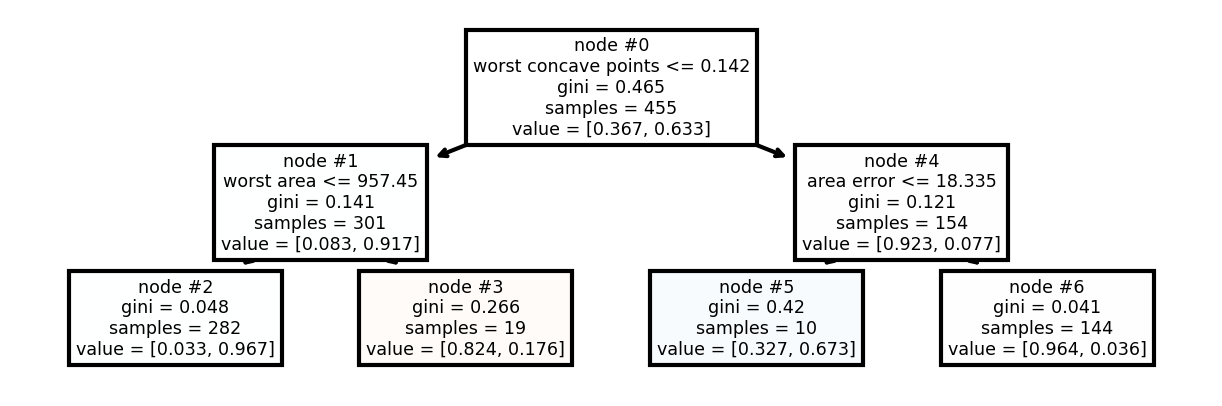

In [70]:
# Comparison with sklearn
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(clf_hs.estimator_, feature_names=X_train.columns, node_ids=True, filled=True, ax=ax);

In [71]:
clf_treeHS.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12ac92950>,
  'id': 0,
  'depth': 0,
  'feature': 'worst concave points',
  'is_leaf_node': False,
  'threshold': 0.1417,
  'gini': 0.4646395362878879,
  'samples': 455,
  'value': 1,
  'value_distribution': [167, 288],
  'prob_distribution': [0.367032967032967, 0.6329670329670329]},
 1: {'node': <DecisionTree.Node at 0x12ac907f0>,
  'id': 1,
  'depth': 1,
  'feature': 'worst area',
  'is_leaf_node': False,
  'threshold': 957.45,
  'gini': 0.14114634496307987,
  'samples': 301,
  'value': 1,
  'value_distribution': [23, 278],
  'prob_distribution': [0.08266187425977373, 0.9173381257402263]},
 2: {'node': <DecisionTree.Node at 0x12acca6b0>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.048413057693274864,
  'samples': 282,
  'value': 1,
  'value_distribution': [7, 275],
  'prob_distribution': [0.032731427975766524, 0.9672685720242336]},
 3: {'node': <DecisionTree.Node at 0x12ac92800>,
  'id': 3,


In [72]:
# Node value probability distribution imodels
np.concatenate(clf_hs.estimator_.tree_.value)

array([[0.36703297, 0.63296703],
       [0.08266187, 0.91733813],
       [0.03273143, 0.96726857],
       [0.82373481, 0.17626519],
       [0.92284919, 0.07715081],
       [0.32650773, 0.67349227],
       [0.9642618 , 0.0357382 ]])

In [73]:
# Node value probability distribution scratch
[list(np.round(node.clf_prob_dis,8)) for node in clf_treeHS.node_list]

[[0.36703297, 0.63296703],
 [0.08266187, 0.91733813],
 [0.03273143, 0.96726857],
 [0.82373481, 0.17626519],
 [0.92284919, 0.07715081],
 [0.32650773, 0.67349227],
 [0.9642618, 0.0357382]]

They are equal

## Further testing of functionality

### Split behavior from scratc models vs. sklearn

In [74]:
max_depth = 4

In [75]:
# sklearn
reg_sklearn_depth = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
reg_sklearn_depth.fit(X_r_train, y_r_train)

y_r_pred_depth = reg_sklearn_depth.predict(X_r_test)

rmse_sklearn_depth = mean_squared_error(y_r_test, y_r_pred_depth, squared=True)
rmse_sklearn_depth

4596.885248935006

[Text(0.5, 0.9, 'node #0\nbmi <= 0.005\nsquared_error = 6028.716\nsamples = 353\nvalue = 152.337'),
 Text(0.25, 0.7, 'node #1\ns5 <= 0.007\nsquared_error = 3585.828\nsamples = 214\nvalue = 118.36'),
 Text(0.125, 0.5, 'node #2\ns2 <= 0.099\nsquared_error = 2381.054\nsamples = 156\nvalue = 101.103'),
 Text(0.0625, 0.3, 'node #3\ns3 <= 0.021\nsquared_error = 2150.942\nsamples = 154\nvalue = 99.279'),
 Text(0.03125, 0.1, 'node #4\nsquared_error = 2668.431\nsamples = 81\nvalue = 112.84'),
 Text(0.09375, 0.1, 'node #5\nsquared_error = 1146.316\nsamples = 73\nvalue = 84.233'),
 Text(0.1875, 0.3, 'node #6\nbmi <= -0.022\nsquared_error = 132.25\nsamples = 2\nvalue = 241.5'),
 Text(0.15625, 0.1, 'node #7\nsquared_error = 0.0\nsamples = 1\nvalue = 253.0'),
 Text(0.21875, 0.1, 'node #8\nsquared_error = 0.0\nsamples = 1\nvalue = 230.0'),
 Text(0.375, 0.5, 'node #9\nbmi <= -0.023\nsquared_error = 3870.795\nsamples = 58\nvalue = 164.776'),
 Text(0.3125, 0.3, 'node #10\ns2 <= 0.037\nsquared_error = 25

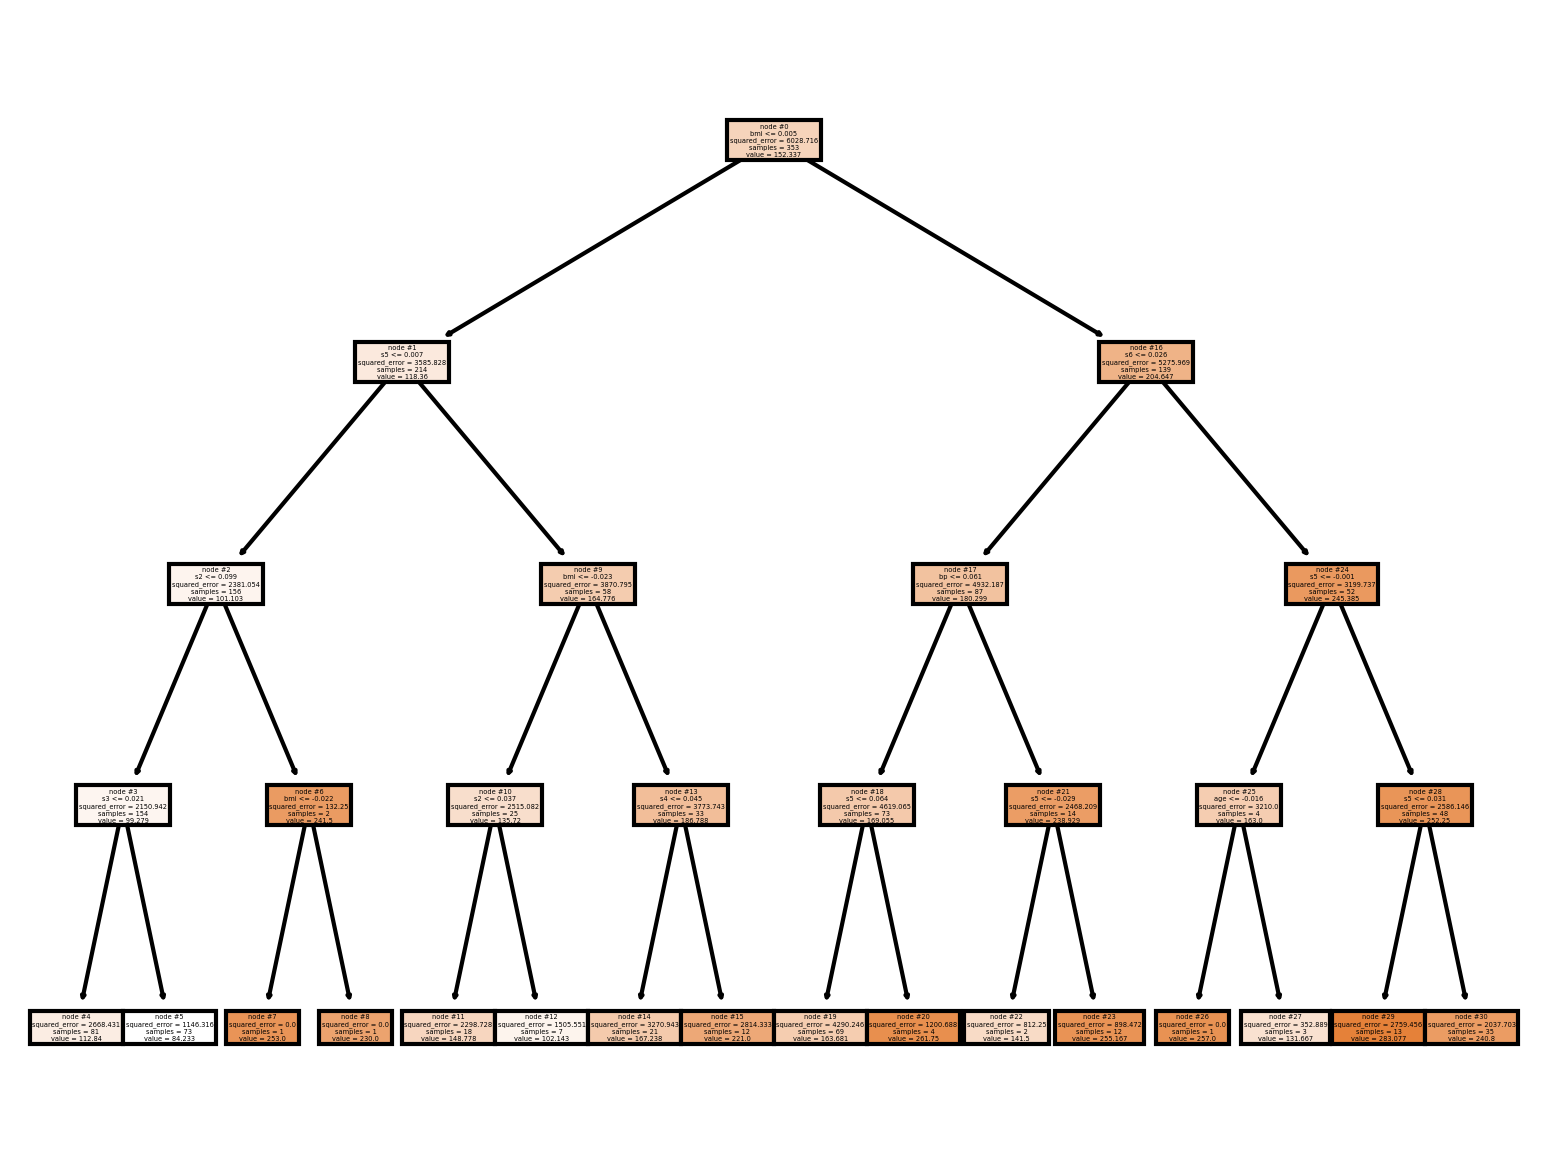

In [76]:
#_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(reg_sklearn_depth, feature_names=X_r_train.columns, node_ids=True, filled=True)#, ax=ax);

In [122]:
#Dingyi
tree_dep, feature_gain_dep, y_list_dep = decision_tree_algorithm(X_r_train, y_r_train, len(y_r_train), max_depth=max_depth, random_state=42)


In [123]:
y_list_dep

{0: [0, 353, 152.3371104815864],
 1: [1, 214, 118.35981308411215],
 2: [2, 156, 101.1025641025641],
 3: [3, 83, 115.93975903614458],
 4: [4, 23, 95.03755870645648],
 5: [4, 60, 125.0763930527242],
 6: [3, 73, 84.23287671232876],
 7: [4, 53, 91.39724083750372],
 8: [4, 20, 75.18506761631707],
 9: [2, 58, 164.77586206896552],
 10: [3, 25, 135.72],
 11: [4, 4, 109.05678955093803],
 12: [4, 21, 144.5329800271285],
 13: [3, 33, 186.78787878787878],
 14: [4, 4, 129.2402675594776],
 15: [4, 29, 189.74908873028753],
 16: [1, 139, 204.6474820143885],
 17: [2, 87, 180.29885057471265],
 18: [3, 73, 169.05479452054794],
 19: [4, 69, 165.68084564370938],
 20: [4, 4, 251.93416326200867],
 21: [3, 14, 238.92857142857142],
 22: [4, 7, 214.2856829141642],
 23: [4, 7, 251.86901624749754],
 24: [2, 52, 245.3846153846154],
 25: [3, 4, 172.11274832738815],
 26: [3, 48, 252.25],
 27: [4, 9, 279.1285065772954],
 28: [4, 39, 239.54583637393557]}

In [120]:
tree_dep

{'bmi <= 0.005111072639941301 with num of samples 353 and current y 152.3371104815864 and above y {0: [0, 353, 152.3371104815864]}': [{'s5 <= 0.006616937565137579 with num of samples 214 and current y 118.35981308411215 and above y {0: [0, 353, 152.3371104815864], 1: [1, 214, 118.35981308411215]}': [{'s3 <= 0.02102781591949656 with num of samples 156 and current y 101.1025641025641 and above y {0: [0, 353, 152.3371104815864], 1: [1, 214, 118.35981308411215], 2: [2, 156, 101.1025641025641]}': [{'s5 <= -0.043277313320491485 with num of samples 83 and current y 115.93975903614458 and above y {0: [0, 353, 152.3371104815864], 1: [1, 214, 118.35981308411215], 2: [2, 156, 101.1025641025641], 3: [3, 83, 115.93975903614458]}': [95.03755870645648,
        125.0763930527242]},
      {'sex = -0.044641636506989144 with num of samples 73 and current y 84.23287671232876 and above y {0: [0, 353, 152.3371104815864], 1: [1, 214, 118.35981308411215], 2: [2, 156, 101.1025641025641], 3: [3, 83, 115.9397590

In [77]:
# scratch
reg_tree_depth = DecisionTree(max_depth=max_depth, treetype="regression", HShrinkage=False, random_state=42)
reg_tree_depth.fit(X_r_train, y_r_train)

# Predict
y_r_pred_depth = reg_tree_depth.predict(X_r_test)

rmse_tree_scratch_depth = mean_squared_error(y_r_test, y_r_pred_depth, squared=True)
rmse_tree_scratch_depth

3930.3184574243946

In [78]:
reg_sklearn_depth.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

In [79]:
reg_sklearn_depth.feature_importances_

array([0.00940664, 0.        , 0.53077642, 0.04579313, 0.        ,
       0.04063716, 0.0250877 , 0.01762285, 0.22059313, 0.11008296])

In [80]:
reg_tree_depth.feature_importances_

array([0.        , 0.        , 0.13834062, 0.04393621, 0.        ,
       0.0408772 , 0.11717869, 0.08231216, 0.06318369, 0.51417142])

In [81]:
sc = [np.round(node.value,8) for node in reg_tree_depth.node_list]

In [82]:
sk = np.concatenate(reg_sklearn_depth.tree_.value)

In [83]:
for i, j in zip(sc, sk):
    print(i, j)

152.33711048 [152.33711048]
118.35981308 [118.35981308]
101.1025641 [101.1025641]
99.27922078 [99.27922078]
112.83950617 [112.83950617]
84.23287671 [84.23287671]
241.5 [241.5]
230.0 [253.]
253.0 [230.]
164.77586207 [164.77586207]
135.72 [135.72]
148.77777778 [148.77777778]
102.14285714 [102.14285714]
186.78787879 [186.78787879]
167.23809524 [167.23809524]
221.0 [221.]
204.64748201 [204.64748201]
180.29885057 [180.29885057]
169.05479452 [169.05479452]
163.68115942 [163.68115942]
261.75 [261.75]
238.92857143 [238.92857143]
141.5 [141.5]
255.16666667 [255.16666667]
245.38461538 [245.38461538]
163.0 [163.]
131.66666667 [257.]
257.0 [131.66666667]
252.25 [252.25]
283.07692308 [283.07692308]
240.8 [240.8]


In [84]:
# check node 6
reg_tree_depth.node_id_dict.get(6)

{'node': <DecisionTree.Node at 0x12a9c5fc0>,
 'id': 6,
 'depth': 3,
 'feature': 's2',
 'is_leaf_node': False,
 'threshold': 0.1096972522781714,
 'gini': 132.25,
 'samples': 2,
 'value': 241.5}

In [85]:
reg_sklearn_depth.tree_.impurity[6]

132.25

Apparently sklearn does choose the split point differently if there are multiple features with the same impurity. This makes comparison very hard. 

In [86]:
[node.threshold for node in reg_tree_depth.node_list][6]

0.1096972522781714

In [87]:
[node.gain for node in reg_tree_depth.node_list][6]

0.7492917847025496

In [88]:
#Text(0.1875, 0.3, 'node #6\nbmi <= -0.022\nsquared_error = 132.25\nsamples = 2\nvalue = 241.5'),

In [89]:
# calculate by hand gain if split by bmi in node 6 instead of s2

parent_gini = [node.gini for node in reg_tree_depth.node_list][6]
parent_gini

132.25

In [90]:
feat_dec_path = ['bmi', 's5', 's2', 's2']
thresh_dec_path = [0.005111072639941301, 0.006616937565137579, 0.09858048188464288, 0.1096972522781714]

In [91]:
X_samples_node6 = X_r_train[(X_r_train['bmi']<=thresh_dec_path[0])&(X_r_train['s5']<=thresh_dec_path[1])&(X_r_train['s2']>thresh_dec_path[2])].copy()#&(X_r_train['s2']>thresh_dec_path[3])]

X_samples_node7 = X_samples_node6[X_samples_node6['s2']<=thresh_dec_path[3]].copy()
X_samples_node8 = X_samples_node6[X_samples_node6['s2']>thresh_dec_path[3]].copy()

In [92]:
y_samples_node6 = y_r_train.loc[X_samples_node6.index].copy()

y_samples_node7 = y_r_train.loc[X_samples_node7.index].copy()
y_samples_node8 = y_r_train.loc[X_samples_node8.index].copy()

In [93]:
def gini(y):
    return np.mean((y-np.mean(y))**2)

In [94]:
no_samples_total = y_r_train.shape[0]

In [95]:
n = 2
n_l, n_r = 1, 1

g_l, g_r = gini(y_samples_node7), gini(y_samples_node8)
child_gini = (n_l/n) * g_l + (n_r/n) * g_r

# calculate the IG (weighted impurity)
information_gain = (n / no_samples_total) * (parent_gini -child_gini)
information_gain

0.7492917847025496

In [96]:
information_gain == [node.gain for node in reg_tree_depth.node_list][6]

True

The information gain is the same. I dont really know if I will be ever be able to replicate the exact same results of deep trees from sklearn with my code ... But my result is also correct

### Check feature subsampling

In [97]:
max_features=5

In [98]:
# sklearn
reg_sklearn_sub = DecisionTreeRegressor(max_depth=2, max_features=max_features ,random_state=42)
reg_sklearn_sub.fit(X_r_train, y_r_train)

y_r_pred_sub = reg_sklearn_sub.predict(X_r_test)

rmse_sklearn_sub = mean_squared_error(y_r_test, y_r_pred_sub, squared=True)
rmse_sklearn_sub

3908.0789825790616

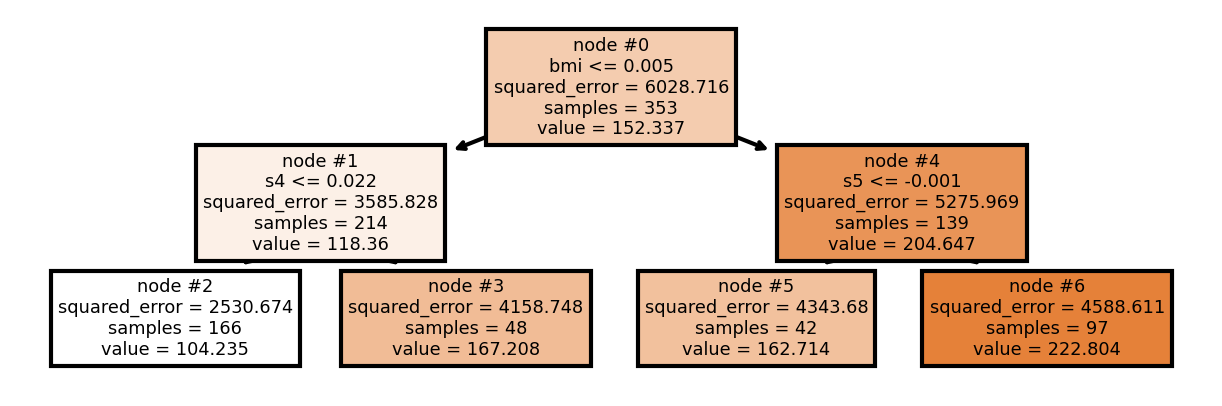

In [99]:
_, ax = plt.subplots(figsize=(5,1.5))
plot_tree(reg_sklearn_sub, feature_names=X_r_train.columns, node_ids=True, filled=True, ax=ax);

In [100]:
# scratch
reg_tree_sub = DecisionTree(max_depth=2, treetype="regression",n_features=max_features, HShrinkage=False, random_state=42)
reg_tree_sub.fit(X_r_train, y_r_train)

# Predict
y_r_pred_sub = reg_tree_sub.predict(X_r_test)

rmse_tree_scratch_sub = mean_squared_error(y_r_test, y_r_pred_sub, squared=True)
rmse_tree_scratch_sub

3545.7752218126952

In [101]:
rmse_tree_scratch_sub ==rmse_sklearn_sub

False

In [102]:
reg_tree_sub.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12adb5750>,
  'id': 0,
  'depth': 0,
  'feature': 's4',
  'is_leaf_node': False,
  'threshold': -0.004806329250737881,
  'gini': 6028.716384851817,
  'samples': 353,
  'value': 152.3371104815864},
 1: {'node': <DecisionTree.Node at 0x12adb5db0>,
  'id': 1,
  'depth': 1,
  'feature': 'bp',
  'is_leaf_node': False,
  'threshold': 0.027036661977810593,
  'gini': 3550.19345103365,
  'samples': 141,
  'value': 113.23404255319149},
 2: {'node': <DecisionTree.Node at 0x12ac12b90>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 2743.390177804217,
  'samples': 123,
  'value': 104.32520325203252},
 3: {'node': <DecisionTree.Node at 0x12adb5690>,
  'id': 3,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 4814.9876543209875,
  'samples': 18,
  'value': 174.11111111111111},
 4: {'node': <DecisionTree.Node at 0x12adb5270>,
  'id': 4,
  'depth': 1,
  'feature': 's5',
  'is_

In [103]:
reg_tree_sub.feature_importances_

array([0.        , 0.        , 0.        , 0.11414098, 0.        ,
       0.        , 0.        , 0.53583026, 0.35002877, 0.        ])

It seems to work as expected, but I cannot reproduce the results from sklearn. The random feature subsampling seed seems to be different, but I can not make it work to replicate it. 

### `k` parameter for finite sample correction

In [242]:
# scratch
reg_tree_k = DecisionTree(max_depth=3, treetype="regression",k=50, random_state=42)
reg_tree_k.fit(X_r_train, y_r_train)

# Predict
y_r_pred_k = reg_tree_k.predict(X_r_test)

rmse_tree_scratch_k = mean_squared_error(y_r_test, y_r_pred_k, squared=True)
rmse_tree_scratch_k

5538.096264350845

In [243]:
reg_tree_k.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

if the k parameter is too high the tree will have no splits == global mean will be predicted

In [239]:
# sklearn
reg_sklearn_k = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_sklearn_k.fit(X_r_train, y_r_train)

y_r_pred_k = reg_sklearn_k.predict(X_r_test)

rmse_sklearn_k = mean_squared_error(y_r_test, y_r_pred_k, squared=True)
rmse_sklearn_k

3604.296950238613

### Other parameters to limit growth of tree

`min_samples_split` 

In [244]:
# scratch
reg_tree_k = DecisionTree(min_samples_split=138, treetype="regression", random_state=42)
reg_tree_k.fit(X_r_train, y_r_train)

# Predict
y_r_pred_k = reg_tree_k.predict(X_r_test)

rmse_tree_scratch_k = mean_squared_error(y_r_test, y_r_pred_k, squared=True)
rmse_tree_scratch_k

4311.236592348165

In [245]:
reg_tree_k.feature_importances_

array([0.        , 0.        , 0.62239596, 0.        , 0.        ,
       0.03961573, 0.03116994, 0.        , 0.17004698, 0.13677139])

In [246]:
reg_tree_k.max_depth_

4

In [248]:
reg_tree_k.decision_paths

[(0, 1, 2, 3, 4),
 (0, 1, 2, 3, 5),
 (0, 1, 2, 6),
 (0, 1, 7),
 (0, 8, 9),
 (0, 8, 10)]

In [252]:
[(node.leaf_node, node.samples>=138) for node in reg_tree_k.node_list]

[(False, True),
 (False, True),
 (False, True),
 (False, True),
 (True, False),
 (True, False),
 (True, False),
 (True, False),
 (False, True),
 (True, False),
 (True, False)]

`min_samples_split` seems to work perfectly fine

In [253]:
# check min_samples_leaf
reg_tree_k = DecisionTree(min_samples_leaf=50, treetype="regression", random_state=42)
reg_tree_k.fit(X_r_train, y_r_train)

# Predict
y_r_pred_k = reg_tree_k.predict(X_r_test)

rmse_tree_scratch_k = mean_squared_error(y_r_test, y_r_pred_k, squared=True)
rmse_tree_scratch_k

3882.7794517024054

In [254]:
reg_tree_k.max_depth_

2

In [255]:
[(node.leaf_node, node.samples) for node in reg_tree_k.node_list]

[(False, 353),
 (False, 214),
 (True, 156),
 (True, 58),
 (False, 139),
 (True, 87),
 (True, 52)]

`min_samples_leaf` also works 